#Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

#Data

In [ ]:
#Unigramas
unigrams_train = pd.read_csv('bag_of_unigrams_train.csv')
unigrams_validation = pd.read_csv('bag_of_unigrams_validation.csv')
unigrams_test = pd.read_csv('bag_of_unigrams_test.csv')
#Bigramas
bigrams_train = pd.read_csv('bag_of_bigrams_train.csv')
bigrams_validation = pd.read_csv('bag_of_bigrams_validation.csv')
bigrams_test = pd.read_csv('bag_of_bigrams_test.csv')
#Trigramas
trigrams_train = pd.read_csv('bag_of_trigrams_train.csv')
trigrams_validation = pd.read_csv('bag_of_trigrams_validation.csv')
trigrams_test = pd.read_csv('bag_of_trigrams_test.csv')
#id
train_id = list(unigrams_train.id)
validation_id = list(unigrams_validation.id)
test_id = list(unigrams_test.id)
#labels
y_train = list(unigrams_train.target)
y_validation = list(unigrams_validation.target)


unigrams_train = unigrams_train.drop(['id','target'],axis = 1)
unigrams_validation = unigrams_validation.drop(['id','target'],axis = 1)
unigrams_test = unigrams_test.drop('id',axis = 1)

bigrams_train = bigrams_train.drop(['id','target'],axis = 1)
bigrams_validation = bigrams_validation.drop(['id','target'],axis = 1)
bigrams_test = bigrams_test.drop('id',axis = 1)

trigrams_train = trigrams_train.drop(['id','target'],axis = 1)
trigrams_validation = trigrams_validation.drop(['id','target'],axis = 1)
trigrams_test = trigrams_test.drop('id',axis = 1)

In [ ]:
train = pd.read_csv('set_train_features_3.csv')
validation = pd.read_csv('set_validation_features_3.csv')
test = pd.read_csv('set_test_features_3.csv')

In [ ]:
train = train.drop(['target','id'],axis = 1)
validation = validation.drop(['target','id'],axis = 1)
test = test.drop(['id'],axis = 1)

In [ ]:
train = pd.concat([train,unigrams_train,bigrams_train,trigrams_train],axis = 1)
validation = pd.concat([validation,unigrams_validation,bigrams_validation,trigrams_validation],axis = 1)
test = pd.concat([test,unigrams_test,bigrams_test,trigrams_test],axis = 1)

In [ ]:
print(train.shape)
print(validation.shape)
print(test.shape)

(6090, 2421)
(1523, 2421)
(3263, 2421)


#Parameters Tuning

Busco los parametros que maximicen la validación cruzada

##Estimators

In [ ]:
y = []
estimators = range(400,1000,10)

print('Estimator Tuning...\n')

for n in estimators:

  
  model_tuned = XGBClassifier(learning_rate = 0.1, n_estimators = n, colsample_bytree = 0.15)
  model_tuned.fit(train, y_train)
  score = model_tuned.score(validation,y_validation)
  print('Training XGBClassifier: Estimators -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best n_estimator is ',estimators[y.index(max(y))],' with ',max(y),' accuracy')

Estimator Tuning...

Training XGBClassifier: Estimators ->  400 ... Score:  0.747866053841103 

Training XGBClassifier: Estimators ->  410 ... Score:  0.747866053841103 

Training XGBClassifier: Estimators ->  420 ... Score:  0.7458962573867367 

Training XGBClassifier: Estimators ->  430 ... Score:  0.747209455022981 

Training XGBClassifier: Estimators ->  440 ... Score:  0.7465528562048588 

Training XGBClassifier: Estimators ->  450 ... Score:  0.7445830597504924 

Training XGBClassifier: Estimators ->  460 ... Score:  0.7452396585686146 

Training XGBClassifier: Estimators ->  470 ... Score:  0.7485226526592252 

Training XGBClassifier: Estimators ->  480 ... Score:  0.7491792514773473 

Training XGBClassifier: Estimators ->  490 ... Score:  0.7465528562048588 

Training XGBClassifier: Estimators ->  500 ... Score:  0.7458962573867367 

Training XGBClassifier: Estimators ->  510 ... Score:  0.7485226526592252 

Training XGBClassifier: Estimators ->  520 ... Score:  0.7478660538411

###Visualization

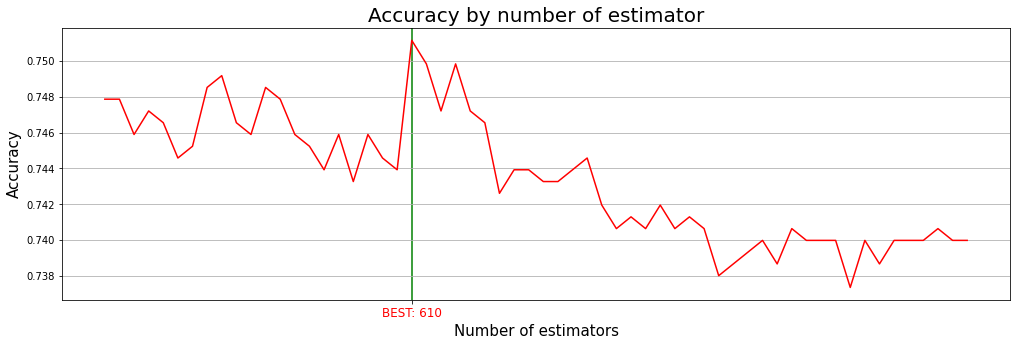

In [ ]:
x = estimators
n_estimator = estimators[y.index(max(y))]
tick = 'BEST' + ': ' + str(n_estimator)
plt.figure(figsize=(17,5))
plt.title('Accuracy by number of estimator',fontsize = 20)
plt.xlabel('Number of estimators', fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.xticks([n_estimator],[tick])
plt.tick_params(labelsize = 'large', labelcolor = 'red',grid_color = 'green', axis = 'x', grid_linewidth = 1.5)
plt.grid()
plt.plot(x, y,color = 'red')
plt.show()

##Learning rate

Busco learning rate que maximice cross validation

In [ ]:
#Tomo la cantidad de estimadores que maximizo el cross validation anterior

learning_rates = [0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2]

y.clear()

print('Learning rate Tuning...\n')

for n in learning_rates:
  model_tuned = XGBClassifier(learning_rate = n, n_estimators = n_estimator, colsample_bytree = 0.15)
  model_tuned.fit(train, y_train)
  score = model_tuned.score(validation,y_validation)
  print('Training XGBClassifier: Learning rate -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best learning rate is ',learning_rates[y.index(max(y))],' with ',max(y),' accuracy')


Learning rate Tuning...

Training XGBClassifier: Learning rate ->  0.05 ... Score:  0.7518056467498359 

Training XGBClassifier: Learning rate ->  0.06 ... Score:  0.747209455022981 

Training XGBClassifier: Learning rate ->  0.07 ... Score:  0.747866053841103 

Training XGBClassifier: Learning rate ->  0.08 ... Score:  0.7485226526592252 

Training XGBClassifier: Learning rate ->  0.09 ... Score:  0.7445830597504924 

Training XGBClassifier: Learning rate ->  0.1 ... Score:  0.7511490479317138 

Training XGBClassifier: Learning rate ->  0.11 ... Score:  0.7452396585686146 

Training XGBClassifier: Learning rate ->  0.12 ... Score:  0.7399868680236376 

Training XGBClassifier: Learning rate ->  0.13 ... Score:  0.747866053841103 

Training XGBClassifier: Learning rate ->  0.14 ... Score:  0.7406434668417596 

Training XGBClassifier: Learning rate ->  0.15 ... Score:  0.7465528562048588 

Training XGBClassifier: Learning rate ->  0.16 ... Score:  0.7406434668417596 

Training XGBClassif

###Visualization

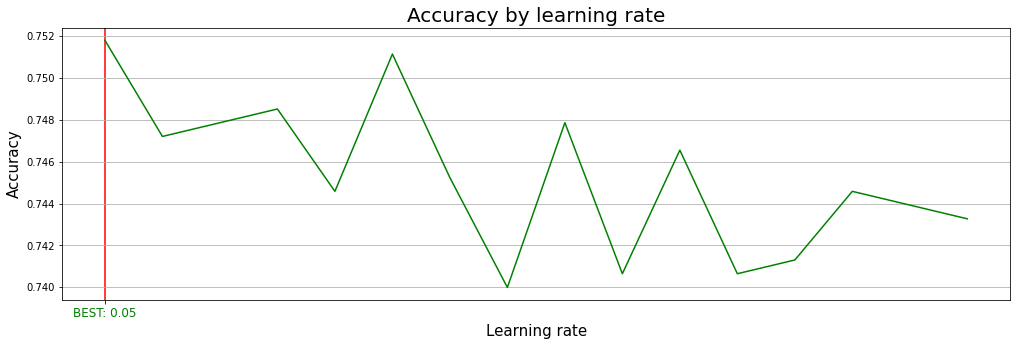

In [ ]:
x = learning_rates
learning_rate = learning_rates[y.index(max(y))]
tick = 'BEST' + ': ' + str(learning_rate)
plt.figure(figsize=(17,5))
plt.title('Accuracy by learning rate',fontsize = 20)
plt.xlabel('Learning rate', fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.xticks([learning_rate],[tick])
plt.tick_params(labelsize = 'large', labelcolor = 'green',grid_color = 'red', axis = 'x', grid_linewidth = 1.5)
plt.grid()
plt.plot(x, y,color = 'green')
plt.show()

##Col_samples

In [ ]:
col_samples = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65]
#Tomo el learning rate que maximizo el cross validation anterior

y.clear()

print('Col Samples Tuning...\n')

for n in col_samples:
  model_tuned = XGBClassifier(learning_rate = learning_rate, n_estimators = n_estimator, colsample_bytree = n)
  model_tuned.fit(train, y_train)
  score = model_tuned.score(validation,y_validation)
  print('Training XGBClassifier: Col samples -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best col_sample is ',col_samples[y.index(max(y))],' with ',max(y),' accuracy')


Col Samples Tuning...

Training XGBClassifier: Col samples ->  0.05 ... Score:  0.767564018384767 

Training XGBClassifier: Col samples ->  0.1 ... Score:  0.7609980302035456 

Training XGBClassifier: Col samples ->  0.15 ... Score:  0.7518056467498359 

Training XGBClassifier: Col samples ->  0.2 ... Score:  0.7458962573867367 

Training XGBClassifier: Col samples ->  0.3 ... Score:  0.7465528562048588 

Training XGBClassifier: Col samples ->  0.35 ... Score:  0.7465528562048588 

Training XGBClassifier: Col samples ->  0.4 ... Score:  0.7419566644780039 

Training XGBClassifier: Col samples ->  0.45 ... Score:  0.7458962573867367 

Training XGBClassifier: Col samples ->  0.5 ... Score:  0.7406434668417596 

Training XGBClassifier: Col samples ->  0.55 ... Score:  0.7386736703873933 

Training XGBClassifier: Col samples ->  0.6 ... Score:  0.7314510833880499 

Training XGBClassifier: Col samples ->  0.65 ... Score:  0.7334208798424163 

DONE!

The best col_sample is  0.05  with  0.767

###Visualization

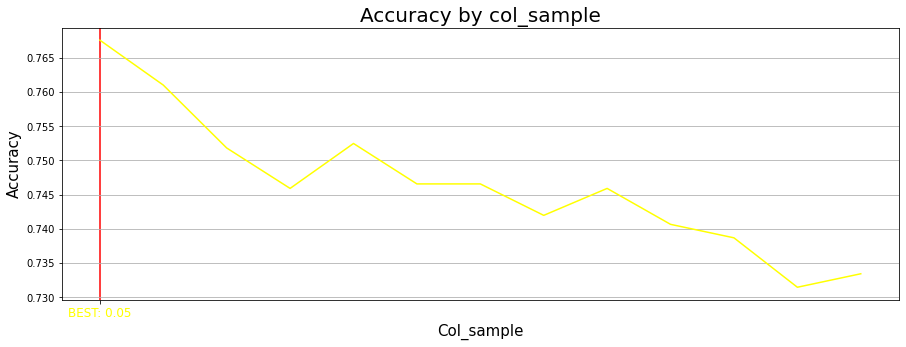

In [ ]:
x = col_samples
col_sample = col_samples[y.index(max(y))]
tick = 'BEST' + ': ' + str(col_sample)
plt.figure(figsize=(15,5))
plt.title('Accuracy by col_sample',fontsize = 20)
plt.xlabel('Col_sample', fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.xticks([col_sample],[tick])
plt.tick_params(labelsize = 'large', labelcolor = 'yellow',grid_color = 'red', axis = 'x', grid_linewidth = 1.5)
plt.grid()
plt.plot(x, y,color = 'yellow')
plt.show()

##Max_depth

In [ ]:
depths = range(5,21)
#Tomo  como col_sample el valor que maximizo el cross validation anterior

y.clear()
depths = range(2,26)

print('Depth Tuning...\n')

for n in depths:
  model_tuned = XGBClassifier(learning_rate = learning_rate, n_estimators = n_estimator, colsample_bytree = col_sample, max_depth = n)
  model_tuned.fit(train, y_train)
  score = model_tuned.score(validation,y_validation)
  print('Training XGBClassifier: max_depth -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best max_depth is ',depths[y.index(max(y))],' with ',max(y),' accuracy')


Depth Tuning...

Training XGBClassifier: max_depth ->  2 ... Score:  0.7596848325673013 

Training XGBClassifier: max_depth ->  3 ... Score:  0.767564018384767 

Training XGBClassifier: max_depth ->  4 ... Score:  0.7616546290216678 

Training XGBClassifier: max_depth ->  5 ... Score:  0.7715036112934996 

Training XGBClassifier: max_depth ->  6 ... Score:  0.7820091923834537 

Training XGBClassifier: max_depth ->  7 ... Score:  0.7760998030203545 

Training XGBClassifier: max_depth ->  8 ... Score:  0.7826657912015759 

Training XGBClassifier: max_depth ->  9 ... Score:  0.7820091923834537 

Training XGBClassifier: max_depth ->  10 ... Score:  0.7767564018384767 

Training XGBClassifier: max_depth ->  11 ... Score:  0.7813525935653316 

Training XGBClassifier: max_depth ->  12 ... Score:  0.7767564018384767 

Training XGBClassifier: max_depth ->  13 ... Score:  0.7767564018384767 

Training XGBClassifier: max_depth ->  14 ... Score:  0.7813525935653316 

Training XGBClassifier: max_de

###Visualization

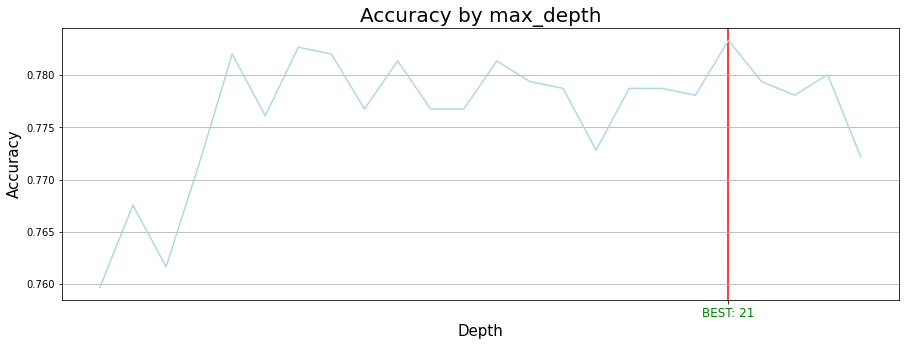

In [ ]:
x = depths
depth = depths[y.index(max(y))]
tick = 'BEST' + ': ' + str(depth)
plt.figure(figsize=(15,5))
plt.title('Accuracy by max_depth',fontsize = 20)
plt.xlabel('Depth', fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.xticks([depth],[tick])
plt.tick_params(labelsize = 'large', labelcolor = 'green',grid_color = 'red', axis = 'x', grid_linewidth = 1.5)
plt.grid()
plt.plot(x, y,color = 'lightblue')
plt.show()

##Base Score

In [ ]:
base_scores = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
#Tomo como depth el valor que maximizo el cross validation anterior
depth = depths[y.index(max(y))]

y.clear()

print('Base score Tuning...\n')

for n in base_scores:
  model_tuned = XGBClassifier(learning_rate = learning_rate, n_estimators = n_estimator, colsample_bytree = col_sample, max_depth = depth, base_score = n)
  model_tuned.fit(train, y_train)
  score = model_tuned.score(validation,y_validation)
  print('Training XGBClassifier: base score -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best base score is ',base_scores[y.index(max(y))],' with ',max(y),' accuracy')


Base score Tuning...

Training XGBClassifier: base score ->  0.1 ... Score:  0.7820091923834537 

Training XGBClassifier: base score ->  0.15 ... Score:  0.7852921864740644 

Training XGBClassifier: base score ->  0.2 ... Score:  0.7826657912015759 

Training XGBClassifier: base score ->  0.25 ... Score:  0.783322390019698 

Training XGBClassifier: base score ->  0.3 ... Score:  0.7806959947472094 

Training XGBClassifier: base score ->  0.35 ... Score:  0.7826657912015759 

Training XGBClassifier: base score ->  0.4 ... Score:  0.7760998030203545 

Training XGBClassifier: base score ->  0.45 ... Score:  0.7800393959290873 

Training XGBClassifier: base score ->  0.5 ... Score:  0.783322390019698 

Training XGBClassifier: base score ->  0.55 ... Score:  0.7872619829284307 

Training XGBClassifier: base score ->  0.6 ... Score:  0.7774130006565988 

Training XGBClassifier: base score ->  0.65 ... Score:  0.7813525935653316 

Training XGBClassifier: base score ->  0.7 ... Score:  0.77938

#Visualization

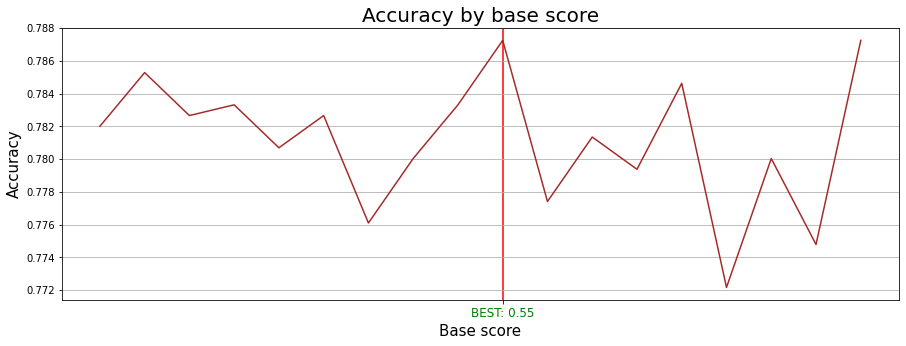

In [ ]:
x = base_scores
base_score = base_scores[y.index(max(y))]
tick = 'BEST' + ': ' + str(base_score)
plt.figure(figsize=(15,5))
plt.title('Accuracy by base score',fontsize = 20)
plt.xlabel('Base score', fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.xticks([base_score],[tick])
plt.tick_params(labelsize = 'large', labelcolor = 'green',grid_color = 'red', axis = 'x', grid_linewidth = 1.5)
plt.grid()
plt.plot(x, y,color = 'Brown')
plt.show()

#MODELO

In [ ]:
model = XGBClassifier(max_depth = depth, learning_rate = learning_rate, n_estimators = n_estimator, colsample_bytree = col_sample, base_score = base_score)
model.fit(train, y_train)

print('Train accuracy: ',model.score(train, y_train))
print('Validation accuracy: ',model.score(validation,y_validation))

Train accuracy:  0.9932676518883415
Validation accuracy:  0.7872619829284307


#Feature importance

In [ ]:
feature_importance = model.feature_importances_
feature_name = list(train.columns)

feature_importance_top = []

for i in range(len(feature_name)):
  feature_importance_top.append( (feature_name[i],feature_importance[i]))

feature_importance_top.sort(key = lambda x: x[1], reverse = True)
feature_importance_top = feature_importance_top[:8]

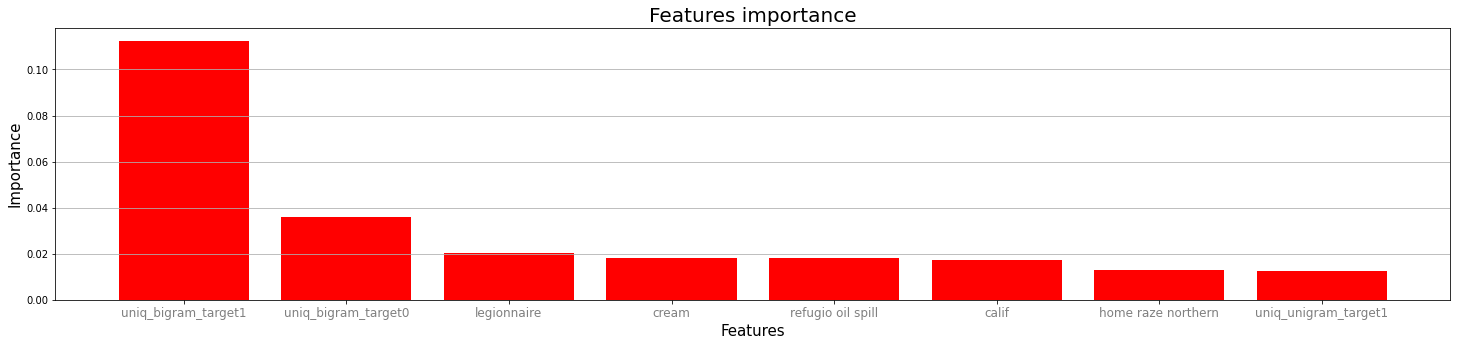

In [ ]:
names = []
values = []

for tupla in feature_importance_top:
  names.append(tupla[0])
  values.append(tupla[1])

f, ax = plt.subplots(figsize=(25,5))
plt.bar(range(8),values,color ='red')
plt.xticks(range(8), names)
plt.grid(axis = 'y')
ax.set_title('Features importance', fontsize = 20)
ax.tick_params(labelsize = 'large', axis = 'x', labelcolor = 'gray')
ax.set_xlabel('Features',fontsize = 15)
ax.set_ylabel('Importance', fontsize = 15)
plt.show()

#Predictions

In [ ]:
val_predictions = model.predict(validation)
test_predictions = model.predict(test)

In [ ]:
pd.DataFrame({'id':validation_id,'target':val_predictions}).to_csv('VAL_prediction_model1_bis.csv', header = True, index = False)
pd.DataFrame({'id':test_id,'target':test_predictions}).to_csv('TEST_prediction_model1_bis.csv', header = True, index = False)